In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from collections import Counter
import numpy as np
from scipy.optimize import minimize_scalar

In [412]:
df= pd.read_csv('https://raw.githubusercontent.com/ormarketing/b2b/master/data.csv')
df.head()

,ID,Close Date,Created Date,New Logo,Type,Stage,Billing Plan,ACV,Discount Amount,Amount,Net Amount
0,1,5/26/17,5/4/17,1,Direct - Cloud Product,Closed Lost,3 Years,431370,,225000,225000
1,2,12/29/16,11/29/16,1,Partner - OnPremise Product,Closed Won - Paid,3 Years,22050,80850,147000,66150
2,3,12/29/16,12/9/16,1,Partner - Cloud Product,Closed Won - Paid,3 Years,32750,43200,96000,52800
3,4,9/9/16,4/20/16,1,Direct - Cloud Product,Closed Won - Paid,4 Years,36694,44800,128000,83200
4,5,9/22/16,9/1/16,1,Partner - OnPremise Product,Closed Won - Paid,3 Years,18700,9900,66000,56100


In [413]:
df.dtypes

ID                    int64
Close Date           object
Created Date         object
New Logo              int64
Type                 object
Stage                object
Billing Plan         object
 ACV                 object
 Discount Amount     object
 Amount              object
 Net Amount          object
dtype: object

# Clean & Explore Data

## Convert Data Type 

In [414]:
df.columns

Index(['ID', 'Close Date', 'Created Date', 'New Logo', 'Type', 'Stage',
       'Billing Plan', ' ACV ', ' Discount Amount ', ' Amount ',
       ' Net Amount '],
      dtype='object')

In [0]:
# to numeric
df['amount']=pd.to_numeric(df[' Amount '],errors='coerce')
df['net amount']=pd.to_numeric(df[' Net Amount '],errors='coerce')
df['discount']=df['amount']-df['net amount']
df['depth']=df['discount']/df['amount']

In [0]:
# to date
df['Close Date'] = pd.to_datetime(df['Close Date'])
df['Created Date'] = pd.to_datetime(df['Created Date'])

In [417]:
df.dtypes

ID                            int64
Close Date           datetime64[ns]
Created Date         datetime64[ns]
New Logo                      int64
Type                         object
Stage                        object
Billing Plan                 object
 ACV                         object
 Discount Amount             object
 Amount                      object
 Net Amount                  object
amount                      float64
net amount                  float64
discount                    float64
depth                       float64
dtype: object

Lost    971
Won     534
Name: Stage, dtype: int64

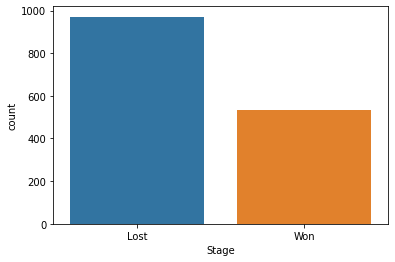

In [418]:
# Stage column 
df['Stage']=np.where(df['Stage'] =='Closed Lost', 'Lost', df['Stage'])
df['Stage']=np.where(df['Stage'] =='Closed Won - Paid', 'Won', df['Stage'])
df['Stage']=np.where(df['Stage'] =='Closed Won - Not Paid', 'Won', df['Stage'])
df['Stage']=np.where(df['Stage'] =='Closed - Lost', 'Lost', df['Stage'])
df['Stage']=np.where(df['Stage'] =='Closed Lost - Not Renewing', 'Lost', df['Stage'])
sns.countplot(x='Stage',data=df)
df['Stage'].value_counts()

## Four Types relation with Conversion

Stage                        Lost  Won
Type                                  
Direct - Cloud Product         46   22
Direct - OnPremise Product    301   82
Partner - Cloud Product       116  114
Partner - OnPremise Product   508  316


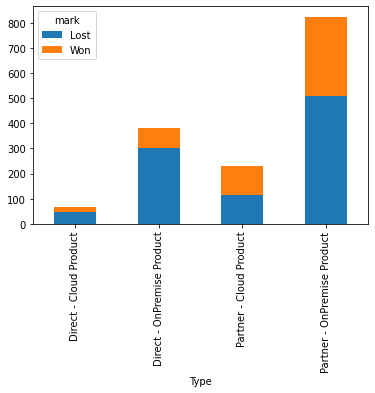

In [419]:
ct = pd.crosstab(df.Type,df.Stage)
print(ct)

ct.plot.bar(stacked=True)
plt.legend(title='mark')
plt.show()

Since Type[Direct - Cloud Product] has too small data size, we are unable to regress on only this type. So we decide to combine Types into either Partner vs. Direct or Partner vs. Direct, and then regress on each category. 

## Partner vs. Direct Types relation with Conversion

In [0]:
df1 = df.copy()

In [0]:
# Type as Partner vs. Direct
df1['Type']=np.where(df1['Type'] == 'Partner - Cloud Product', 'Partner',df1['Type'])
df1['Type']=np.where(df1['Type'] =='Partner - OnPremise Product', 'Partner',df1['Type'])
df1['Type']=np.where(df1['Type'] =='Direct - OnPremise Product', 'Direct',df1['Type'])
df1['Type']=np.where(df1['Type'] =='Direct - Cloud Product', 'Direct',df1['Type'])

Stage    Lost  Won
Type              
Direct    347  104
Partner   624  430


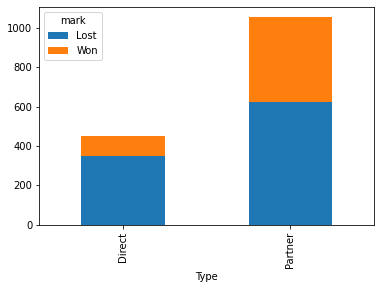

In [422]:
ct = pd.crosstab(df1['Type'],df1.Stage)
print(ct)

ct.plot.bar(stacked=True)
plt.legend(title='mark')
plt.show()

In [423]:
# Use chi-square test to test if there is  significant relation between Partner vs. Direct Types relation with Conversion
c, p, dof, expected = scipy.stats.chi2_contingency(ct)
if p < 0.05:
    result = "Partner vs. Direct Types is reltated to Conversion"
else:
    result =  "Partner vs. Direct Types is NOT reltated to Conversion"

print(result)

Partner vs. Direct Types is reltated to Conversion


## Cloud vs. On-Prem Types relation with Conversion

In [0]:
df2 = df.copy()

In [0]:
# Type as Partner vs. Direct
df2['Type']=np.where(df2['Type'] == 'Partner - Cloud Product', 'Cloud',df2['Type'])
df2['Type']=np.where(df2['Type'] =='Partner - OnPremise Product', 'OnPremise',df2['Type'])
df2['Type']=np.where(df2['Type'] =='Direct - OnPremise Product', 'OnPremise',df2['Type'])
df2['Type']=np.where(df2['Type'] =='Direct - Cloud Product', 'Cloud',df2['Type'])

Stage      Lost  Won
Type                
Cloud       162  136
OnPremise   809  398


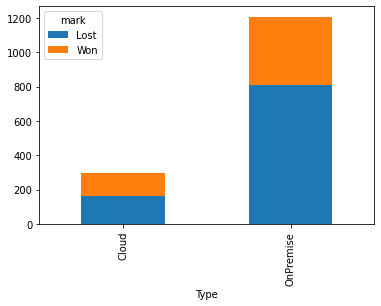

In [426]:
ct = pd.crosstab(df2['Type'],df2.Stage)
print(ct)

ct.plot.bar(stacked=True)
plt.legend(title='mark')
plt.show()

In [427]:
# Use chi-square test to test if there is  significant relation between Cloud vs. On-Prem Types relation with Conversion
c, p, dof, expected = scipy.stats.chi2_contingency(ct)
if p < 0.05:
    result = "Cloud vs. On-Prem Types is reltated to Conversion"
else:
    result =  "Cloud vs. On-Prem Types is NOT reltated to Conversion"

print(result)

Cloud vs. On-Prem Types is reltated to Conversion


## New Logo relation with Conversion

Stage     Lost  Won
New Logo           
0          705   99
1          266  435


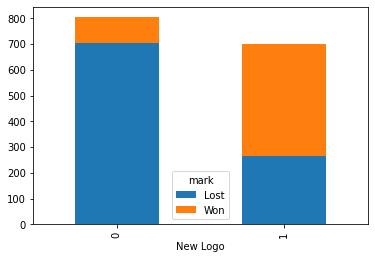

In [428]:
ct = pd.crosstab(df['New Logo'],df.Stage)
print(ct)

ct.plot.bar(stacked=True)
plt.legend(title='mark')
plt.show()

In [429]:
# Use chi-square test to test if there is  significant relation between New Logo vs. Not New relation with Conversion
c, p, dof, expected = scipy.stats.chi2_contingency(ct)
if p < 0.05:
    result = "New Logo vs. Not New  is reltated to Conversion"
else:
    result =  "New Logo vs. Not New  is NOT reltated to Conversion"

print(result)

New Logo vs. Not New  is reltated to Conversion


## Times Series

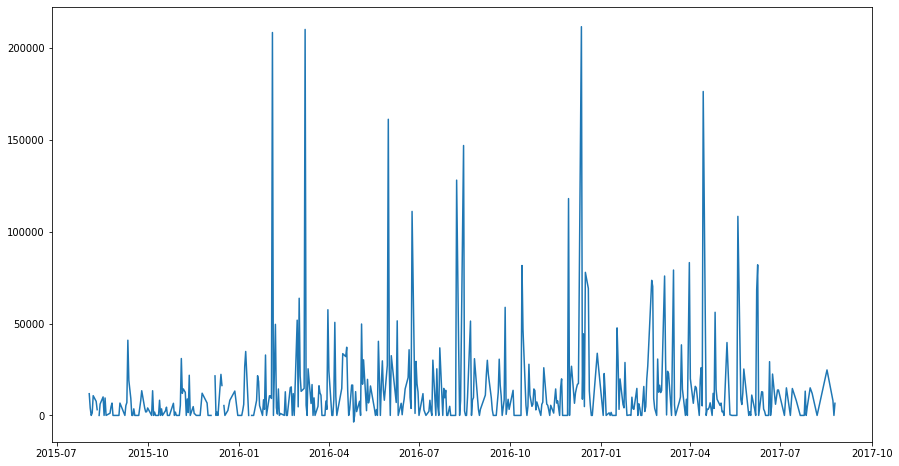

In [430]:
# average of discount by date
plt.figure(figsize=(14.7,8))
df=df.sort_values(by=['Created Date'])
plt.plot(df['Created Date'].unique(),df['discount'].groupby(df['Created Date']).mean())

In [0]:
df['month']=pd.PeriodIndex(df['Created Date'], freq='M')
df['month']=df['month'].astype(str)

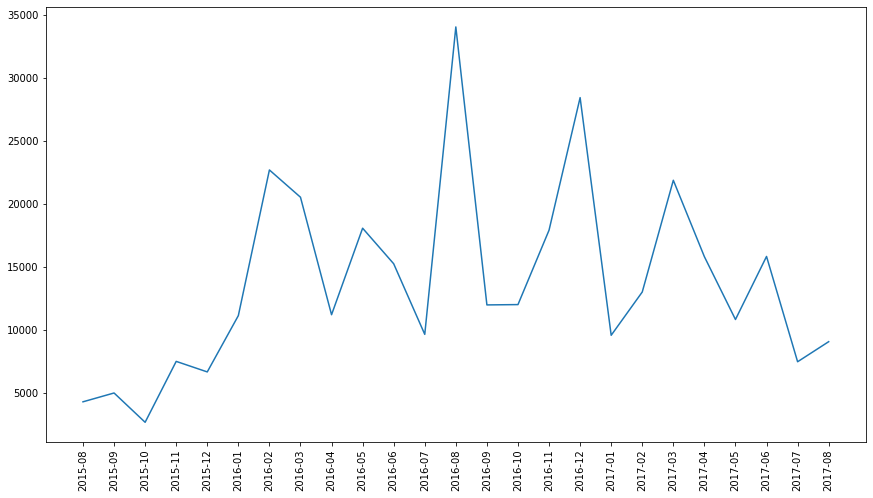

In [432]:
# average of discount by month
plt.figure(figsize=(14.7,8))
plt.plot(df['month'].unique(),df['discount'].groupby(df['month']).mean())
plt.xticks(df['month'].unique(), df['month'].unique(), rotation='vertical');
plt.show()

In [0]:
df['stage_number']=df['Stage'].replace({'Won': 1, 'Lost': 0})

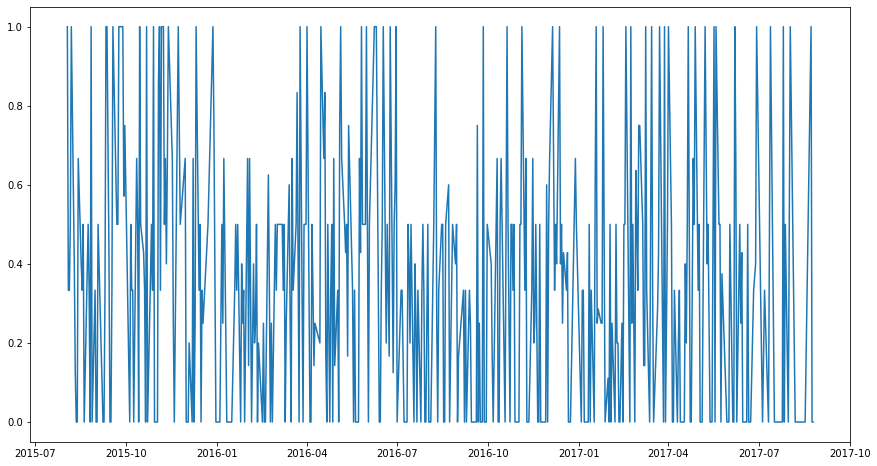

In [434]:
# average of conversion rate by date
plt.figure(figsize=(14.7,8))
df=df.sort_values(by=['Created Date'])
plt.plot(df['Created Date'].unique(),df['stage_number'].groupby(df['Created Date']).mean())

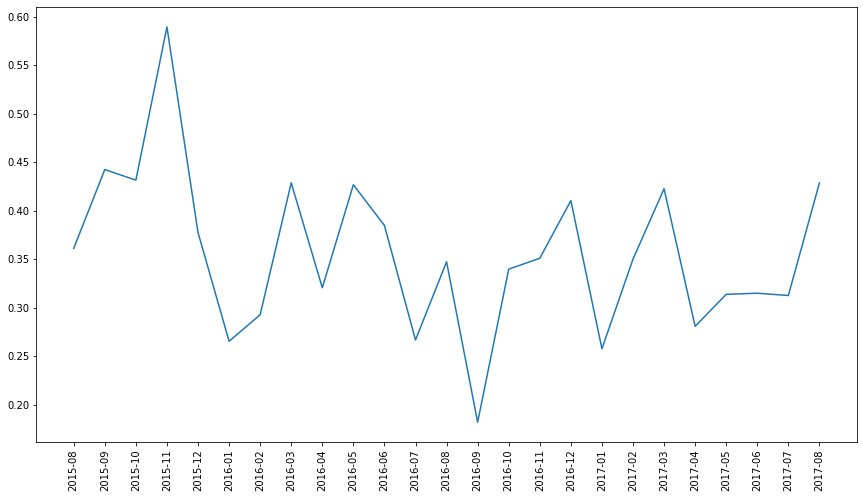

In [435]:
# average of conversion rate by month
plt.figure(figsize=(14.7,8))
plt.plot(df['month'].unique(),df['stage_number'].groupby(df['month']).mean())
plt.xticks(df['month'].unique(), df['month'].unique(), rotation='vertical');
plt.show()

In [0]:
df['quarter']=pd.PeriodIndex(df['Created Date'], freq='Q')
df['quarter']=df['quarter'].astype(str)

It is showed that the discount and conversion rate is usually higher at the end of the quarter and lower at the begining of the quarter.

# Predict Conversion Rate

## Split Train Test

In [0]:
data = df.copy()

In [438]:
# Create binary Y
data['y']=np.where(df['Stage'] =='Won', 1.0,0.0)

data['Partner vs. Direct'] = df1['Type']
data['Cloud vs. On-Prem'] = df2['Type']
#create binary variables
data['Partner cloud']=np.where(df['Type'] =='Partner - Cloud Product', 1.0,0.0)
data['Partner prem']=np.where(df['Type'] =='Partner - OnPremise Product', 1.0, 0.0)
data['Direct cloud']=np.where(df['Type'] =='Direct - Cloud Product', 1.0,0.0)
data['Direct prem']=np.where(df['Type'] =='Direct - OnPremise Product', 1.0, 0.0)
data.head()

,ID,Close Date,Created Date,New Logo,Type,Stage,Billing Plan,ACV,Discount Amount,Amount,Net Amount,amount,net amount,discount,depth,month,stage_number,quarter,y,Partner vs. Direct,Cloud vs. On-Prem,Partner cloud,Partner prem,Direct cloud,Direct prem
747,748,2015-08-11,2015-08-03,0,Partner - OnPremise Product,Won,Annual,17900,NaN,17900,17900,17900.0,17900.0,0.0,0.000000,2015-08,1,2015Q3,1.0,Partner,OnPremise,0.0,1.0,0.0,0.0
785,786,2015-12-17,2015-08-03,0,Partner - OnPremise Product,Won,3 Years,15394,23628,69810,46182,69810.0,46182.0,23628.0,0.338462,2015-08,1,2015Q3,1.0,Partner,OnPremise,0.0,1.0,0.0,0.0
246,247,2015-11-03,2015-08-04,0,Partner - OnPremise Product,Lost,NaN,31680,NaN,31680,31680,31680.0,31680.0,0.0,0.000000,2015-08,0,2015Q3,0.0,Partner,OnPremise,0.0,1.0,0.0,0.0
376,377,2016-05-19,2015-08-04,0,Direct - OnPremise Product,Lost,NaN,22000,NaN,22000,22000,22000.0,22000.0,0.0,0.000000,2015-08,0,2015Q3,0.0,Direct,OnPremise,0.0,0.0,0.0,1.0
753,754,2015-08-28,2015-08-04,0,Partner - OnPremise Product,Won,3 Years,13425,13425,53700,40275,53700.0,40275.0,13425.0,0.250000,2015-08,1,2015Q3,1.0,Partner,OnPremise,0.0,1.0,0.0,0.0


In [0]:
train = data[data['ID'] <=1200]
test = data[data['ID'] > 1200]

In [440]:
train.shape

(1200, 25)

In [441]:
test.shape

(305, 25)

In [442]:
# train test balance
from collections import Counter

print("train data:", Counter(train['y']))
print("train data 1 proportion:", len(train[train['y']==1])/len(train))
print("test data:", Counter(test['y']))
print("test data 1 proportion:", len(test[test['y']==1])/len(test))

train data: Counter({0.0: 757, 1.0: 443})
train data 1 proportion: 0.36916666666666664
test data: Counter({0.0: 214, 1.0: 91})
test data 1 proportion: 0.2983606557377049


## Regress on whole dataset

In [0]:
X_train = train[['discount','amount','New Logo','Partner cloud','Partner prem','Direct cloud','Direct prem']]
y_train = train['y']
X_test = test[['discount','amount','New Logo','Partner cloud','Partner prem','Direct cloud','Direct prem']]
y_test = test['y']

In [444]:
logreg=sm.Logit(y_train, X_train, missing='drop').fit()
y_prob = logreg.predict(X_test)
y_label = [ 0.0 if x < 0.5 else 1.0 for x in y_prob]
print("1. In Sample Performance")
print(logreg.summary())
print('\n')
print("2. Out of Sample Performance")
print("- Confusion Matrix")
print(confusion_matrix(y_test, y_label))
print('\n')
print("- Key Metrics")
print(classification_report(y_test, y_label))   

Optimization terminated successfully.
         Current function value: 0.445041
         Iterations 8
1. In Sample Performance
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 1151
Model:                          Logit   Df Residuals:                     1144
Method:                           MLE   Df Model:                            6
Date:                Mon, 08 Jun 2020   Pseudo R-squ.:                  0.3318
Time:                        04:38:28   Log-Likelihood:                -512.24
converged:                       True   LL-Null:                       -766.56
Covariance Type:            nonrobust   LLR p-value:                1.160e-106
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
discount       5.506e-05   6.59e-06      8.352      0.000    4.21e-05     6.8

# Price Optimization

In [445]:
# find the individual optimized discount for each individual customer
import numpy as np
from scipy.optimize import minimize
ID=0
ID_max=len(X_test)
z=np.empty([ID_max,])
while ID<=ID_max-1:
  UT=np.matmul(X_test.iloc[ID,1:7],logreg.params[1:7])
  b=logreg.params[0]
  p=X_test.iloc[ID,1]
  def revenueD(d):
    """This is the negative revenue function"""
    return -np.exp(UT+b*np.sqrt(d**2))/(1+np.exp(UT+b*np.sqrt(d**2)))*(p-np.sqrt(d**2))
  sol3=minimize_scalar(revenueD)
  z[ID]=sol3.x
  ID=ID+1
print(round(np.mean(z),0),np.round(np.mean(test['discount']),0))

13557.0 12685.0


In [447]:
test['optimal discount']=np.sqrt(z**2)
test.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,ID,Close Date,Created Date,New Logo,Type,Stage,Billing Plan,ACV,Discount Amount,Amount,Net Amount,amount,net amount,discount,depth,month,stage_number,quarter,y,Partner vs. Direct,Cloud vs. On-Prem,Partner cloud,Partner prem,Direct cloud,Direct prem,optimal discount
1354,1355,2015-12-16,2015-08-04,0,Direct - OnPremise Product,Lost,NaN,17900,NaN,17900,17900,17900.0,17900.0,0.0,0.0,2015-08,0,2015Q3,0.0,Direct,OnPremise,0.0,0.0,0.0,1.0,1.534687e-11
1348,1349,2016-07-05,2015-08-05,0,Partner - OnPremise Product,Lost,NaN,89142,NaN,89142,89142,89142.0,89142.0,0.0,0.0,2015-08,0,2015Q3,0.0,Partner,OnPremise,0.0,1.0,0.0,0.0,4.299395e+04
1317,1318,2015-09-14,2015-08-06,0,Partner - OnPremise Product,Lost,NaN,17900,NaN,17900,17900,17900.0,17900.0,0.0,0.0,2015-08,0,2015Q3,0.0,Partner,OnPremise,0.0,1.0,0.0,0.0,0.000000e+00
1324,1325,2016-02-17,2015-08-10,0,Partner - OnPremise Product,Lost,NaN,17900,NaN,17900,17900,17900.0,17900.0,0.0,0.0,2015-08,0,2015Q3,0.0,Partner,OnPremise,0.0,1.0,0.0,0.0,0.000000e+00
1314,1315,2016-02-17,2015-08-11,0,Partner - OnPremise Product,Lost,NaN,17900,NaN,17900,17900,17900.0,17900.0,0.0,0.0,2015-08,0,2015Q3,0.0,Partner,OnPremise,0.0,1.0,0.0,0.0,0.000000e+00


# Computation Revenue Improvement

In [448]:
# Get the optimized revenue for each individual user
xS=test[['optimal discount','amount','New Logo','Partner cloud','Partner prem','Direct cloud','Direct prem']]
#print(xS.shape,logreg.params.shape)
ID=0
ID_max=len(test)
revOpt=np.empty([ID_max,])
while ID<=ID_max-1:
  u=np.dot(xS.iloc[ID],logreg.params)
  proba=np.exp(u)/(1+np.exp(u))
  revOpt[ID]=proba*(xS['amount'].array[ID]-z[ID])
  ID=ID+1
revOpt=np.nan_to_num(revOpt)
test['Optimized Revenue']=revOpt
test.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,ID,Close Date,Created Date,New Logo,Type,Stage,Billing Plan,ACV,Discount Amount,Amount,Net Amount,amount,net amount,discount,depth,month,stage_number,quarter,y,Partner vs. Direct,Cloud vs. On-Prem,Partner cloud,Partner prem,Direct cloud,Direct prem,optimal discount,Optimized Revenue
1354,1355,2015-12-16,2015-08-04,0,Direct - OnPremise Product,Lost,NaN,17900,NaN,17900,17900,17900.0,17900.0,0.0,0.0,2015-08,0,2015Q3,0.0,Direct,OnPremise,0.0,0.0,0.0,1.0,1.534687e-11,1309.241809
1348,1349,2016-07-05,2015-08-05,0,Partner - OnPremise Product,Lost,NaN,89142,NaN,89142,89142,89142.0,89142.0,0.0,0.0,2015-08,0,2015Q3,0.0,Partner,OnPremise,0.0,1.0,0.0,0.0,4.299395e+04,27986.226909
1317,1318,2015-09-14,2015-08-06,0,Partner - OnPremise Product,Lost,NaN,17900,NaN,17900,17900,17900.0,17900.0,0.0,0.0,2015-08,0,2015Q3,0.0,Partner,OnPremise,0.0,1.0,0.0,0.0,0.000000e+00,2525.251787
1324,1325,2016-02-17,2015-08-10,0,Partner - OnPremise Product,Lost,NaN,17900,NaN,17900,17900,17900.0,17900.0,0.0,0.0,2015-08,0,2015Q3,0.0,Partner,OnPremise,0.0,1.0,0.0,0.0,0.000000e+00,2525.251787
1314,1315,2016-02-17,2015-08-11,0,Partner - OnPremise Product,Lost,NaN,17900,NaN,17900,17900,17900.0,17900.0,0.0,0.0,2015-08,0,2015Q3,0.0,Partner,OnPremise,0.0,1.0,0.0,0.0,0.000000e+00,2525.251787


In [449]:
test['Revenue']=np.where(test['Stage'] =='Won',test['net amount'] ,0.0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
dff=test[['Type','Stage','discount','optimal discount','Revenue','Optimized Revenue']]
stat = round(dff.groupby('Type').mean(),2)

In [451]:
#the ratio of the optimized expected revenue / actual revenues
stat['ratio'] = stat['Optimized Revenue']/stat['Revenue']
stat
#print(stat.to_string())

,discount,optimal discount,Revenue,Optimized Revenue,ratio
Type,,,,,
Direct - Cloud Product,12471.76,22118.00,9029.41,24332.93,2.694853
Direct - OnPremise Product,2937.01,8453.22,4851.02,8067.76,1.663106
Partner - Cloud Product,52629.22,32126.23,58460.92,90747.89,1.552283
Partner - OnPremise Product,10492.98,11950.59,15357.20,24114.16,1.570219


In [452]:
print("Actual Total Revenue: ", test['Revenue'].sum())
print("Optimized Total Revnue: ", test['Optimized Revenue'].sum())
print("Ratio: ", test['Optimized Revenue'].sum()/test['Revenue'].sum())

Actual Total Revenue:  4883527.0
Optimized Total Revnue:  7879923.169463238
Ratio:  1.613572151738536


# A Function of the Whole Process

In [0]:
def Optimization(X_train, y_train, X_test, y_test, test):
  #### Regression to predict conversion rate
  logreg=sm.Logit(y_train, X_train, missing='drop').fit()
  y_prob = logreg.predict(X_test)
  y_label = [ 0.0 if x < 0.5 else 1.0 for x in y_prob]
  #print("Regression Performance")
  #print(logreg.summary())
  #print('\n')


  #### Price Optimization
  ID=0
  ID_max=len(X_test)
  z=np.empty([ID_max,])
  while ID<=ID_max-1:
    UT=np.matmul(X_test.iloc[ID,1:],logreg.params[1:])
    b=logreg.params[0]
    p=X_test.iloc[ID,1]
    def revenueD(d):
      """This is the negative revenue function"""
      return -np.exp(UT+b*np.sqrt(d**2))/(1+np.exp(UT+b*np.sqrt(d**2)))*(p-np.sqrt(d**2))
    sol3=minimize_scalar(revenueD)
    z[ID]=sol3.x
    ID=ID+1
  #print("Price Optimization")
  print("Optimized mean discount: ", round(np.mean(z),0), "Actual mean discount: ", np.round(np.mean(X_test['discount']),0))
  #print('\n')
  #test['optimal discount']=np.sqrt(z**2)
  #return test

  xS = X_test.copy().rename(columns={'discount':'optimal discount'})
  xS['optimal discount'] = np.sqrt(z**2)
  test['optimal discount']=np.sqrt(z**2)

# Get the optimized revenue for each individual user
  ID=0
  ID_max=len(X_test)
  revOpt=np.empty([ID_max,])
  while ID<=ID_max-1:
    u=np.dot(xS.iloc[ID],logreg.params)
    proba=np.exp(u)/(1+np.exp(u))
    revOpt[ID]=proba*(xS['amount'].array[ID]-z[ID])
    ID=ID+1
  revOpt=np.nan_to_num(revOpt)
  test['Optimized Revenue']=revOpt
  dff=test[['Type','Stage','discount','optimal discount','Revenue','Optimized Revenue']]

  dff.groupby('Type').mean()
  stat = round(dff.groupby('Type').mean(),2)
  stat

  #### the ratio of the optimized expected revenue / actual revenues
  stat['ratio'] = stat['Optimized Revenue']/stat['Revenue']
  print(stat.to_string())
  print('\n')

  print("Actual Total Revenue: ", test['Revenue'].sum())
  print("Optimized Total Revnue: ", test['Optimized Revenue'].sum())
  print("Ratio: ", test['Optimized Revenue'].sum()/test['Revenue'].sum())
  print('\n')



# Compare results with classification

## Regress on Whole Dataset (Same as above)

In [0]:
data['Revenue']=np.where(data['Stage'] =='Won',data['net amount'] ,0.0)
data['Partner vs. Direct']=np.where(data['Partner vs. Direct'] =='Partner',1.0 ,0.0)
data['Cloud vs. On-Prem']=np.where(data['Cloud vs. On-Prem'] =='Cloud',1.0 ,0.0)

In [456]:
train1 = data[data['ID'] <=1200]
test1 = data[data['ID'] > 1200]
X_train1 = train1[['discount','amount','New Logo','Partner cloud','Partner prem','Direct cloud','Direct prem']]
y_train1 = train1['y']
X_test1 = test1[['discount','amount','New Logo','Partner cloud','Partner prem','Direct cloud','Direct prem']]
y_test1 = test1['y']
Optimization(X_train1, y_train1, X_test1, y_test1, test1)

Optimization terminated successfully.
         Current function value: 0.445041
         Iterations 8
Optimized mean discount:  13557.0 Actual mean discount:  12685.0
                             discount  optimal discount   Revenue  Optimized Revenue     ratio
Type                                                                                          
Direct - Cloud Product       12471.76          22118.00   9029.41           24332.93  2.694853
Direct - OnPremise Product    2937.01           8453.22   4851.02            8067.76  1.663106
Partner - Cloud Product      52629.22          32126.23  58460.92           90747.89  1.552283
Partner - OnPremise Product  10492.98          11950.59  15357.20           24114.16  1.570219


Actual Total Revenue:  4883527.0
Optimized Total Revnue:  7879923.169463238
Ratio:  1.613572151738536




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


When we regress on the whole dateset, the total revenue would increase by 161.36%

## Regress on Partner vs Direct

In [457]:
# Partner
train_partner = data[(data['ID'] <=1200) & (data['Partner vs. Direct']==1)]
test_partner = data[(data['ID'] > 1200) & (data['Partner vs. Direct']==1)]
X_train = train_partner[['discount','amount','New Logo','Cloud vs. On-Prem']]
y_train = train_partner['y']
X_test = test_partner[['discount','amount','New Logo','Cloud vs. On-Prem']]
y_test = test_partner['y']
Optimization(X_train, y_train, X_test, y_test, test_partner)

Optimization terminated successfully.
         Current function value: 0.540239
         Iterations 8
Optimized mean discount:  17473.0 Actual mean discount:  19416.0
                             discount  optimal discount   Revenue  Optimized Revenue     ratio
Type                                                                                          
Partner - Cloud Product      52629.22          41542.95  58460.92           85213.19  1.457609
Partner - OnPremise Product  10492.98          11054.57  15357.20           29065.33  1.892619


Actual Total Revenue:  4162458.0
Optimized Total Revnue:  6991494.538545401
Ratio:  1.6796552754515244




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [458]:
# direct
train_direct = data[(data['ID'] <=1200) & (data['Partner vs. Direct']==0)]
test_direct = data[(data['ID'] > 1200) & (data['Partner vs. Direct']==0)]
X_train = train_direct[['discount','amount','New Logo','Cloud vs. On-Prem']]
y_train = train_direct['y']
X_test = test_direct[['discount','amount','New Logo','Cloud vs. On-Prem']]
y_test = test_direct['y']
Optimization(X_train, y_train, X_test, y_test, test_direct)

Optimization terminated successfully.
         Current function value: 0.514679
         Iterations 7
Optimized mean discount:  11686.0 Actual mean discount:  4147.0
                            discount  optimal discount  Revenue  Optimized Revenue     ratio
Type                                                                                        
Direct - Cloud Product      12471.76          26237.65  9029.41           27043.08  2.995000
Direct - OnPremise Product   2937.01           9571.18  4851.02           13478.52  2.778492


Actual Total Revenue:  721069.0
Optimized Total Revnue:  2036718.7359265918
Ratio:  2.8245823020079794




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [459]:
partner_opt = 6991494.538545401
direct_opt = 2036718.7359265918
actual_total = 4883527.0
ratio = round((partner_opt+direct_opt)/actual_total*100, 2)

print("When we regress seperately on Partner vs. Direct, then total revenue would increase by", ratio,"%")

When we regress seperately on Partner vs. Direct, then total revenue would increase by 184.87 %


## Regress on Cloud vs OnPrem

In [460]:
# Cloud
train_cloud = data[(data['ID'] <=1200) & (data['Cloud vs. On-Prem']==1)]
test_cloud = data[(data['ID'] > 1200) & (data['Cloud vs. On-Prem']==1)]
X_train = train_cloud[['discount','amount','New Logo','Partner vs. Direct']]
y_train = train_cloud['y']
X_test = test_cloud[['discount','amount','New Logo','Partner vs. Direct']]
y_test = test_cloud['y']
Optimization(X_train, y_train, X_test, y_test, test_cloud)

Optimization terminated successfully.
         Current function value: 0.486277
         Iterations 7
Optimized mean discount:  34521.0 Actual mean discount:  39749.0
                         discount  optimal discount   Revenue  Optimized Revenue     ratio
Type                                                                                      
Direct - Cloud Product   12471.76          14096.65   9029.41           35214.41  3.899968
Partner - Cloud Product  52629.22          44166.12  58460.92           77973.57  1.333773


Actual Total Revenue:  2258093.0
Optimized Total Revnue:  3405693.710553274
Ratio:  1.5082167610250217




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [461]:
# On Prem
train_onprem = data[(data['ID'] <=1200) & (data['Cloud vs. On-Prem']==0)]
test_onprem = data[(data['ID'] > 1200) & (data['Cloud vs. On-Prem']==0)]
X_train = train_onprem[['discount','amount','New Logo','Partner vs. Direct']]
y_train = train_onprem['y']
X_test = test_onprem[['discount','amount','New Logo','Partner vs. Direct']]
y_test = test_onprem['y']
Optimization(X_train, y_train, X_test, y_test, test_onprem)

Optimization terminated successfully.
         Current function value: 0.527746
         Iterations 8
Optimized mean discount:  10411.0 Actual mean discount:  6971.0
                             discount  optimal discount   Revenue  Optimized Revenue     ratio
Type                                                                                          
Direct - OnPremise Product    2937.01           4803.09   4851.02           19217.03  3.961441
Partner - OnPremise Product  10492.98          15270.98  15357.20           27321.58  1.779073


Actual Total Revenue:  2625434.0
Optimized Total Revnue:  5936804.896278892
Ratio:  2.2612660978256898




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [462]:
cloud_opt = 3405693.710553274
onprem_opt = 5936804.896278892
actual_total = 4883527.0
ratio = round((cloud_opt+onprem_opt)/actual_total*100, 2)

print("When we regress seperately on Cloud vs. OnPrem, the total revenue would increase by", ratio,"%")

When we regress seperately on Cloud vs. OnPrem, the total revenue would increase by 191.31 %


## Regress on New Logo or vs. Old Logo

In [464]:
# New
train_new = data[(data['ID'] <=1200) & (data['New Logo']==1)]
test_new = data[(data['ID'] > 1200) & (data['New Logo']==1)]
X_train = train_new[['discount','amount','Cloud vs. On-Prem','Partner vs. Direct']]
y_train = train_new['y']
X_test = test_new[['discount','amount','Cloud vs. On-Prem','Partner vs. Direct']]
y_test = test_new['y']
Optimization(X_train, y_train, X_test, y_test, test_new)

Optimization terminated successfully.
         Current function value: 0.549035
         Iterations 8
Optimized mean discount:  11349.0 Actual mean discount:  22537.0
                             discount  optimal discount   Revenue  Optimized Revenue     ratio
Type                                                                                          
Direct - Cloud Product       15126.67          18060.18  12791.67           31500.38  2.462570
Direct - OnPremise Product    5390.66           2222.17  10075.29           18255.82  1.811940
Partner - Cloud Product      60540.57          27862.75  70153.10          106523.06  1.518437
Partner - OnPremise Product  14033.19           6574.83  31555.53           35966.60  1.139788


Actual Total Revenue:  4124064.0
Optimized Total Revnue:  5993814.421222595
Ratio:  1.453375704456234




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [465]:
# Old
train_old = data[(data['ID'] <=1200) & (data['New Logo']==0)]
test_old = data[(data['ID'] > 1200) & (data['New Logo']==0)]
X_train = train_old[['discount','amount','Cloud vs. On-Prem','Partner vs. Direct']]
y_train = train_old['y']
X_test = test_old[['discount','amount','Cloud vs. On-Prem','Partner vs. Direct']]
y_test = test_old['y']
Optimization(X_train, y_train, X_test, y_test, test_old)

         Current function value: 0.337084
         Iterations: 35


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimized mean discount:  18986.0 Actual mean discount:  5617.0
                             discount  optimal discount  Revenue  Optimized Revenue     ratio
Type                                                                                         
Direct - Cloud Product        6100.00          49289.39     0.00               0.00       NaN
Direct - OnPremise Product    1756.77          13092.97  2338.08           14097.88  6.029682
Partner - Cloud Product      13072.50          67255.06     0.00               0.00       NaN
Partner - OnPremise Product   8580.45          19266.43  6606.38           24489.97  3.707018


Actual Total Revenue:  759463.0
Optimized Total Revnue:  3244360.0631856825
Ratio:  4.271913263958458




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [466]:
new_opt = 5993814.421222594
old_opt = 3244360.0631856835
actual_total = 4883527.0
ratio = round((new_opt+old_opt)/actual_total*100, 2)

print("When we regress seperately on New Logo vs. Old Logo, the total revenue would increase by", ratio,"%")

When we regress seperately on New Logo vs. Old Logo, the total revenue would increase by 189.17 %
